In [63]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

In [ ]:
# Rows: observations, Columns: predictors
# For now it is just a sample dataset
X = np.array([
    [5.1, 3.5, 1.4, 0.2, 2.5],
    [4.9, 3.0, 1.4, 0.2, 2.7],
    [6.2, 3.4, 5.4, 2.3, 3.8],
    [5.9, 3.0, 4.2, 1.5, 3.4],
    [6.7, 3.1, 4.7, 1.4, 3.6]
])

print("Original Data:\n", X)

Original Data:
 [[5.1 3.5 1.4 0.2 2.5]
 [4.9 3.  1.4 0.2 2.7]
 [6.2 3.4 5.4 2.3 3.8]
 [5.9 3.  4.2 1.5 3.4]
 [6.7 3.1 4.7 1.4 3.6]]


In [65]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0, ddof=1)
standardized_X = (X - means) / stds

print("Standardized Data:\n", standardized_X)

Standardized Data:
 [[-0.87573  1.2792  -1.06731 -1.01166 -1.22788]
 [-1.1411  -0.8528  -1.06731 -1.01166 -0.87706]
 [ 0.58382  0.8528   1.04617  1.29757  1.05247]
 [ 0.18576 -0.8528   0.41213  0.41786  0.35082]
 [ 1.24725 -0.4264   0.67631  0.3079   0.70165]]


In [66]:
covariance_matrix = np.cov(standardized_X, rowvar=False)
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[ 1.      -0.08487  0.92086  0.81488  0.90771]
 [-0.08487  1.      -0.05069  0.04689 -0.13089]
 [ 0.92086 -0.05069  1.       0.97436  0.9917 ]
 [ 0.81488  0.04689  0.97436  1.       0.96444]
 [ 0.90771 -0.13089  0.9917   0.96444  1.     ]]


In [67]:
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues:
 [3.79387 1.01386 0.18632 0.00596 0.     ]
Eigenvectors:
 [[-0.48022  0.02596  0.81687 -0.11382  0.29745]
 [ 0.03951 -0.98947  0.08684  0.09577 -0.05172]
 [-0.51262 -0.02763 -0.08303 -0.40484 -0.7521 ]
 [-0.4944  -0.12956 -0.54324 -0.32932  0.57898]
 [-0.5105   0.05223 -0.15222  0.83995 -0.0893 ]]


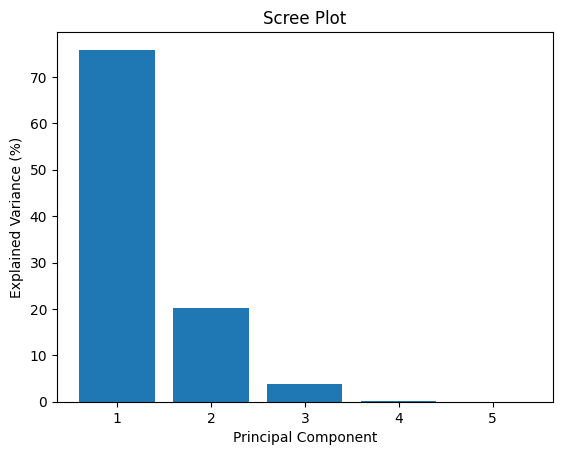

In [68]:
# Scree plot
explained_var = eigenvalues / eigenvalues.sum()
plt.bar(range(1, len(explained_var)+1), explained_var*100)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first two principal components explain the majority of the variance in the data (about 96%). This means that most of the information in the original variables can be represented in just two dimensions.

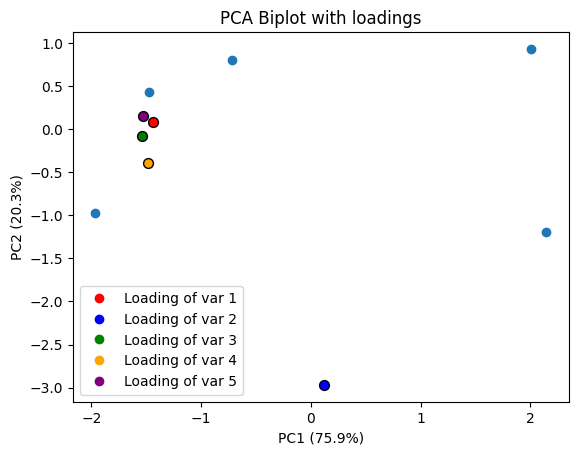

In [69]:
scores = np.dot(standardized_X, eigenvectors)

plt.scatter(scores[:,0], scores[:,1])
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, color in enumerate(colors):
    x = eigenvectors[i,0]*3
    y = eigenvectors[i,1]*3
    plt.scatter(x, y, color=color, s=50, edgecolor='black')

for i, color in enumerate(colors):
    plt.plot([], [], color=color, marker='o', linestyle='', label=f'Loading of var {i+1}')

plt.xlabel(f"PC1 ({eigenvalues[0]/eigenvalues.sum()*100:.1f}%)")
plt.ylabel(f"PC2 ({eigenvalues[1]/eigenvalues.sum()*100:.1f}%)")
plt.title('PCA Biplot with loadings')
plt.legend()
plt.show()